## Importing Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt # to adjust tree plot

## Reading-In Data

In [ ]:
pd.options.display.max_seq_items = 200
df_ml = pd.read_csv('../data/data_ml_chapter_1.csv')
print(df_ml.columns)

Index(['stock_id', 'date', 'Advt_12M_Usd', 'Advt_3M_Usd', 'Advt_6M_Usd',
       'Asset_Turnover', 'Bb_Yld', 'Bv', 'Capex_Ps_Cf', 'Capex_Sales',
       'Cash_Div_Cf', 'Cash_Per_Share', 'Cf_Sales', 'Debtequity', 'Div_Yld',
       'Dps', 'Ebit_Bv', 'Ebit_Noa', 'Ebit_Oa', 'Ebit_Ta', 'Ebitda_Margin',
       'Eps', 'Eps_Basic', 'Eps_Basic_Gr', 'Eps_Contin_Oper', 'Eps_Dil', 'Ev',
       'Ev_Ebitda', 'Fa_Ci', 'Fcf', 'Fcf_Bv', 'Fcf_Ce', 'Fcf_Margin',
       'Fcf_Noa', 'Fcf_Oa', 'Fcf_Ta', 'Fcf_Tbv', 'Fcf_Toa', 'Fcf_Yld',
       'Free_Ps_Cf', 'Int_Rev', 'Interest_Expense', 'Mkt_Cap_12M_Usd',
       'Mkt_Cap_3M_Usd', 'Mkt_Cap_6M_Usd', 'Mom_11M_Usd', 'Mom_5M_Usd',
       'Mom_Sharp_11M_Usd', 'Mom_Sharp_5M_Usd', 'Nd_Ebitda', 'Net_Debt',
       'Net_Debt_Cf', 'Net_Margin', 'Netdebtyield', 'Ni', 'Ni_Avail_Margin',
       'Ni_Oa', 'Ni_Toa', 'Noa', 'Oa', 'Ocf', 'Ocf_Bv', 'Ocf_Ce', 'Ocf_Margin',
       'Ocf_Noa', 'Ocf_Oa', 'Ocf_Ta', 'Ocf_Tbv', 'Ocf_Toa', 'Op_Margin',
       'Op_Prt_Margin', 'Oper_Ps_Net_

## Organizing Feature Names

In [ ]:
columns_to_drop = [
    'stock_id', 'date', # non-feature identifiers
    'R1M_Usd', 'R3M_Usd', 'R6M_Usd', 'R12M_Usd', # possible numeric features 
    'R1M_Usd_median', 'R12M_Usd_median', # medians used for calculating categorical
    'R1M_Usd_C', 'R12M_Usd_C' # possible categorical features
]

In [ ]:
df_ml.drop(columns=columns_to_drop).columns

Index(['Advt_12M_Usd', 'Advt_3M_Usd', 'Advt_6M_Usd', 'Asset_Turnover',
       'Bb_Yld', 'Bv', 'Capex_Ps_Cf', 'Capex_Sales', 'Cash_Div_Cf',
       'Cash_Per_Share', 'Cf_Sales', 'Debtequity', 'Div_Yld', 'Dps', 'Ebit_Bv',
       'Ebit_Noa', 'Ebit_Oa', 'Ebit_Ta', 'Ebitda_Margin', 'Eps', 'Eps_Basic',
       'Eps_Basic_Gr', 'Eps_Contin_Oper', 'Eps_Dil', 'Ev', 'Ev_Ebitda',
       'Fa_Ci', 'Fcf', 'Fcf_Bv', 'Fcf_Ce', 'Fcf_Margin', 'Fcf_Noa', 'Fcf_Oa',
       'Fcf_Ta', 'Fcf_Tbv', 'Fcf_Toa', 'Fcf_Yld', 'Free_Ps_Cf', 'Int_Rev',
       'Interest_Expense', 'Mkt_Cap_12M_Usd', 'Mkt_Cap_3M_Usd',
       'Mkt_Cap_6M_Usd', 'Mom_11M_Usd', 'Mom_5M_Usd', 'Mom_Sharp_11M_Usd',
       'Mom_Sharp_5M_Usd', 'Nd_Ebitda', 'Net_Debt', 'Net_Debt_Cf',
       'Net_Margin', 'Netdebtyield', 'Ni', 'Ni_Avail_Margin', 'Ni_Oa',
       'Ni_Toa', 'Noa', 'Oa', 'Ocf', 'Ocf_Bv', 'Ocf_Ce', 'Ocf_Margin',
       'Ocf_Noa', 'Ocf_Oa', 'Ocf_Ta', 'Ocf_Tbv', 'Ocf_Toa', 'Op_Margin',
       'Op_Prt_Margin', 'Oper_Ps_Net_Cf', 'Pb', 'Pe', 'Pt

In [ ]:
# this first line is how they do it in the book and it seems to be wrong
#features = list(df_ml.iloc[:,3:95].columns) # Keep the feature's column names (hard-coded, beware!)
features = list(df_ml.drop(columns=columns_to_drop).columns)

features_short = [
    'Div_Yld',
    'Eps', 
    'Mkt_Cap_12M_Usd', 
    'Mom_11M_Usd', 
    'Ocf',
    'Pb', 
    'Vol1Y_Usd',
]

## `DecisionTreeRegressor` Fit

In [ ]:
from sklearn import tree

#X = df_ml.iloc[:,3:96] # recall features/predictors, full sample (PD 4/9/2024 - This seems to be wrong, include the label)
X = df_ml[features]
y = df_ml['R1M_Usd'] # recall label/Dependent variable, full sample

In [ ]:
fit_tree = tree.DecisionTreeRegressor( # Definining the model
  min_samples_split = 8000, # Min nb of obs required to continue splitting 
  max_depth = 3, # Maximum depth (i.e. tree levels)
  ccp_alpha=0.000001, # complexity parameters
  min_samples_leaf =3500 # Min nb of obs required in each terminal node (leaf)
)
fit_tree.fit(X, y) # Fitting the model

DecisionTreeRegressor(ccp_alpha=1e-06, max_depth=3, min_samples_leaf=3500,
                      min_samples_split=8000)

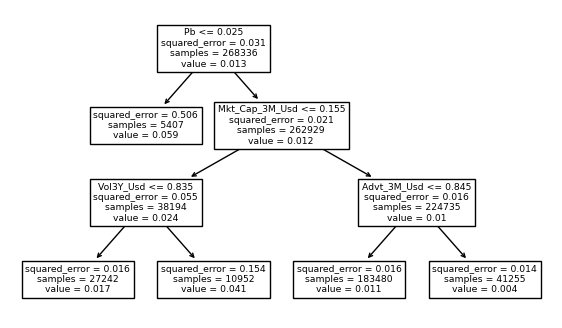

In [ ]:
fig, ax = plt.subplots(figsize=(7, 4)) # resizing
tree.plot_tree(fit_tree, feature_names=X.columns.values, ax=ax) # Plot the tree
plt.show()

### Making Inferences from Fitted Tree

In [ ]:
y_pred=fit_tree.predict(X.iloc[0:6,:])
print(f'y_pred: {y_pred}')

y_pred: [0.01088066 0.01088066 0.01088066 0.01088066 0.04133053 0.04133053]


As a verification of the first splits, we plot the smoothed average of future returns, conditionally on market capitalization, past return and trading volume.

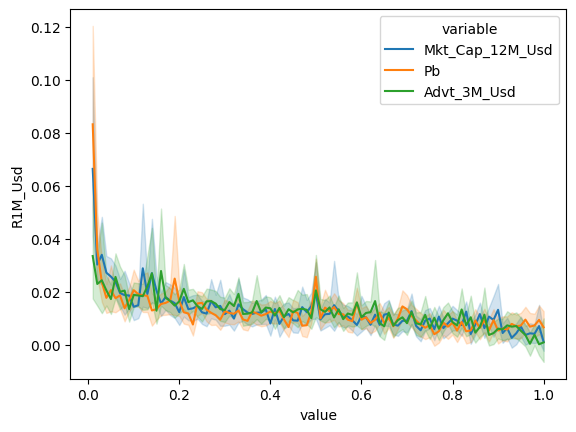

In [ ]:
import seaborn as sns
unpivoted_data_ml = pd.melt(df_ml[['R1M_Usd','Mkt_Cap_12M_Usd','Pb','Advt_3M_Usd']], id_vars='R1M_Usd') # selecting and putting in vector
sns.lineplot(data = unpivoted_data_ml, y='R1M_Usd', x='value', hue='variable'); # Plot from seaborn

Finally, we assess the predictive quality of a single tree on the testing set (the tree is grown on the training set). We use a deeper tree, with a maximum depth of five.

In [ ]:
separation_date = '2014-01-15'
df_train = df_ml.query('date < @separation_date')
df_test = df_ml.query('date >= @separation_date')

# training data
X_train = df_train[features]
y_train = df_train['R1M_Usd']

# testing data
X_test = df_test[features] # Predictors
y_test = df_test['R1M_Usd'] # Dependent variable

In [ ]:
fit_tree2 = tree.DecisionTreeRegressor( # Definining the model
  min_samples_split = 4000, # Min nb of obs required to continue splitting
  max_depth = 5, # Maximum depth (i.e. tree levels)
  ccp_alpha=0.0001, # complexity parameters
  min_samples_leaf =1500 # Min nb of obs required in each terminal node (leaf)
        )
fit_tree2 = fit_tree2.fit(X_train, y_train) # Fitting the model

mse = np.mean((fit_tree2.predict(X_test) - y_test)**2)
print(f'MSE: {mse}')

MSE: 0.036996958091850045


Transforming the average results into hit ratio -- **NEED TO EXPLORE BELOW MORE**

In [ ]:
hitratio = np.mean(fit_tree2.predict(X_test) * y_test > 0)
print(f'Hit Ratio: {hitratio}')

Hit Ratio: 0.5460346399270738


## `RandomForestRegressor()` fit

In [ ]:
from sklearn.ensemble import RandomForestRegressor

fit_RF = RandomForestRegressor(n_estimators = 40, # Nb of random trees
criterion ='friedman_mse', # function to measure the quality of a split
min_samples_split= 250, # Minimum size of terminal cluster
#bootstrap=False, # replacement
bootstrap=True, # no resplacement
max_features=30, # Nb of predictive variables for each tree
max_samples=10000, # Size of (random) sample for each tree
#max_samples = None
)

fit_RF.fit(X_train, y_train) # Fitting the model
fit_RF.predict(pd.DataFrame(X_test).iloc[0:5,]) # Prediction over the first 5 test instances 

array([0.11127065, 0.10877695, 0.10877695, 0.08462475, 0.1049641 ])

In [ ]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test, fit_RF.predict(X_test))
print(f'MSE: {mse}')

MSE: 0.036868504218024935


In [ ]:
hitratio = np.mean(fit_RF.predict(X_test) * y_test > 0)
print(f'Hit Ratio: {hitratio}')

Hit Ratio: 0.537574065633546


## `RandomForestClassifier()` fit

In [ ]:
from sklearn.ensemble import RandomForestClassifier

y_c_train = df_train['R1M_Usd_C']
y_c_test = df_test['R1M_Usd_C'] # Dependent variable


fit_RF_C = RandomForestClassifier( 
n_estimators = 40, # Nb of random trees
criterion ='gini', # function to measure the quality of a split
min_samples_split= 250, # Minimum size of terminal cluster
#bootstrap=False, # replacement
bootstrap=True,
max_features=30, # Nb of predictive variables for each tree
max_samples=20000 # Size of (random) sample for each tree
)
fit_RF_C=fit_RF_C.fit(X_train, y_c_train) # Fitting the model

We can then assess the proportion of correct (binary) guesses.

In [ ]:
hitratio = np.mean(fit_RF_C.predict(X_test) == y_c_test)
print(f'Hit Ratio: {hitratio}')

Hit Ratio: 0.4989887192342753


The accuracy is disappointing. There are two potential explanations for this (beyond the possibility of very different patterns in the training and testing sets). The first one is the sample size, which may be too small. The original training set has more than 200,000 observations, hence we retain only one in 10 in the above training specification. We are thus probably sidelining relevant information and the cost can be heavy. The second reason is the number of predictors, which is set to 30, i.e., one third of the total at our disposal. Unfortunately, this leaves room for the algorithm to pick less pertinent predictors. The default numbers of predictors chosen by the routines are $\sqrt{p}$ and $p/3$ for classification and regression tasks, respectively. Here $p$ is the total number of features.

## `AdaBoostClassifier()`

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

fit_adaboost_C = AdaBoostClassifier(DecisionTreeClassifier(
        max_depth=3), # depth of the tree
        n_estimators=3) # Number of trees 
fit_adaboost_C.fit(X_train, y_c_train) # Fitting the model

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=3),
                   n_estimators=3)

In [ ]:
from sklearn.metrics import accuracy_score # introducing buit-in function for accuracy
hitratio=accuracy_score(y_c_test, fit_adaboost_C.predict(X_test)) # Hitratio
print(f'Hit Ratio: {hitratio}')

Hit Ratio: 0.49641066545123064


## `XGBoost()`

Their implementation is quite complex and I need to understand it better.